In [1]:
# Cell 1 - Local file setup
import os, warnings
warnings.filterwarnings("ignore")

# Automatically detect current working directory
base_dir = os.getcwd()

DATA_FILES = {
    "df_combined": os.path.join(base_dir, "df_combined.csv"),
    "energy_dataset": os.path.join(base_dir, "energy_dataset.csv"),
    "energy_df": os.path.join(base_dir, "energy_df.csv"),
    "max_load_daily": os.path.join(base_dir, "Maximum_Load_Per_Day_with_Timestamps.csv")
}

for k, p in DATA_FILES.items():
    print(f"{k} ->", os.path.exists(p), "| path:", p)


df_combined -> True | path: d:\Professional\BDA PROJECT\df_combined.csv
energy_dataset -> True | path: d:\Professional\BDA PROJECT\energy_dataset.csv
energy_df -> True | path: d:\Professional\BDA PROJECT\energy_df.csv
max_load_daily -> True | path: d:\Professional\BDA PROJECT\Maximum_Load_Per_Day_with_Timestamps.csv


In [2]:
# Cell 2 - Imports (standard libs)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# ✅ Safe universal plotting style setup
try:
    # Works for matplotlib >= 3.6
    plt.style.use('seaborn-v0_8-whitegrid')
except OSError:
    # Fallback for older versions
    sns.set_theme(style="whitegrid")

sns.set_context("talk")


In [3]:
# Cell 3 - Load datasets robustly (tries a few encodings) and inspect shapes
def try_read_csv(path):
    for enc in [None, "utf-8", "latin1"]:
        try:
            return pd.read_csv(path, encoding=enc, low_memory=False)
        except Exception:
            continue
    raise IOError(f"Can't read {path}")

dfs = {}
for name, path in DATA_FILES.items():
    if os.path.exists(path):
        dfs[name] = try_read_csv(path)
        print(name, "loaded:", dfs[name].shape)
    else:
        print("Missing file:", path)

# quick peek
for name, df in dfs.items():
    print("\n---", name, "---")
    display(df.head(3))
    print(df.columns.tolist()[:20])


df_combined loaded: (35064, 17)
energy_dataset loaded: (35064, 29)
energy_df loaded: (35064, 17)
max_load_daily loaded: (1462, 2)

--- df_combined ---


,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,city_name
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,valencia
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,valencia
2,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,valencia


['time', 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind onshore', 'total load actual', 'city_name']

--- energy_dataset ---


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48


['time', 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil coal-derived gas', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation hydro pumped storage aggregated', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation marine', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste']

--- energy_df ---


,Unnamed: 0,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual
0,0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0
1,1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0
2,2,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0


['Unnamed: 0', 'time', 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind onshore', 'total load actual']

--- max_load_daily ---


,time,total load actual
0,2014-12-31 23:00:00+00:00,25385.0
1,2015-01-01 20:00:00+00:00,29571.0
2,2015-01-02 20:00:00+00:00,33668.0


['time', 'total load actual']


In [4]:
# Cell 4 - Identify timestamp column heuristically and standardize timezone
import re
def find_time_col(df):
    for c in df.columns:
        if re.search(r"time|date|timestamp|ts", c, re.I):
            return c
    # fallback: try object columns that parse as datetimes
    for c in df.columns:
        if df[c].dtype == object:
            sample = df[c].dropna().astype(str).head(30).tolist()
            parsed = 0
            for s in sample:
                try:
                    pd.to_datetime(s)
                    parsed += 1
                except:
                    pass
            if parsed >= max(3, int(len(sample)*0.6)):
                return c
    return None

# Find time columns
time_cols = {}
for name, df in dfs.items():
    tc = find_time_col(df)
    time_cols[name] = tc
    print(name, "->", tc)


df_combined -> time
energy_dataset -> time
energy_df -> time
max_load_daily -> time


In [5]:
# Cell 5 - Build a unified hourly time-series dataframe with main target 'total load actual'
import re

# Strategy: prefer energy_dataset -> total load actual column; fall back to other files
base_df = None
for candidate in ["energy_dataset", "df_combined", "energy_df", "max_load_daily"]:
    if candidate in dfs:
        df = dfs[candidate].copy()
        tc = time_cols.get(candidate)
        if tc is None:
            continue
        df['_ts'] = pd.to_datetime(df[tc], errors='coerce')
        # try locate a sensible target column name
        target_col = None
        for pref in ["total load actual", "total load", "total_load_actual", "load", "total load forecast"]:
            for c in df.columns:
                if re.search(pref, str(c), re.I) and pd.api.types.is_numeric_dtype(df[c]):
                    target_col = c
                    break
            if target_col:
                break
        if target_col:
            base_df = df[['_ts', target_col]].rename(columns={'_ts':'timestamp', target_col:'target'})
            print("✅ Base chosen:", candidate, "| target column:", target_col)
            break

if base_df is None:
    raise RuntimeError("❌ Couldn't find base time-series with a numeric 'target' column.")

# --- 🧠 Key Fix ---
# Ensure timestamp index is real datetime
base_df = base_df.set_index('timestamp').sort_index()
base_df.index = pd.to_datetime(base_df.index, errors='coerce')

# Drop any invalid datetimes (NaT)
base_df = base_df[base_df.index.notna()]

# Resample to hourly mean
base_df = base_df.resample('H').mean()

print("✅ Base series index range:", base_df.index.min(), "→", base_df.index.max())
display(base_df.head(5))


✅ Base chosen: energy_dataset | target column: total load actual
✅ Base series index range: 2015-01-01 00:00:00+01:00 → 2018-12-31 23:00:00+01:00


,target
timestamp,
2015-01-01 00:00:00+01:00,25385.0
2015-01-01 01:00:00+01:00,24382.0
2015-01-01 02:00:00+01:00,22734.0
2015-01-01 03:00:00+01:00,21286.0
2015-01-01 04:00:00+01:00,20264.0


In [6]:
# Cell 6 - Merge generation/feature columns from all datasets as regressors (hourly)
# For each other dataframe, parse timestamp, pick numeric columns that are NOT the target, resample hourly and join.
feature_frames = []
for name, df in dfs.items():
    if name == candidate:  # skip chosen base which we already used
        continue
    tc = time_cols.get(name)
    if tc is None:
        continue
    tmp = df.copy()
    tmp['_ts'] = pd.to_datetime(tmp[tc], errors='coerce')
    tmp = tmp.set_index('_ts').sort_index()
    numeric = tmp.select_dtypes("number")
    # drop any columns that duplicate 'target' or obviously leak
    drop = [c for c in numeric.columns if re.search(r"total load|target|max load|load", c, re.I)]
    numeric = numeric.drop(columns=drop, errors='ignore')
    if numeric.shape[1] > 0:
        numeric = numeric.resample('H').mean()
        # prefix to avoid collisions
        numeric = numeric.add_prefix(name + "__")
        feature_frames.append(numeric)

if feature_frames:
    from functools import reduce
    merged_feats = reduce(lambda a,b: a.join(b, how='outer'), feature_frames)
    full = base_df.join(merged_feats, how='left')
else:
    full = base_df.copy()

print("Full dataset shape:", full.shape)
display(full.head(5))


Full dataset shape: (35064, 30)


,target,df_combined__generation biomass,df_combined__generation fossil brown coal/lignite,df_combined__generation fossil gas,df_combined__generation fossil hard coal,df_combined__generation fossil oil,df_combined__generation hydro pumped storage consumption,df_combined__generation hydro run-of-river and poundage,df_combined__generation hydro water reservoir,df_combined__generation nuclear,...,energy_df__generation fossil oil,energy_df__generation hydro pumped storage consumption,energy_df__generation hydro run-of-river and poundage,energy_df__generation hydro water reservoir,energy_df__generation nuclear,energy_df__generation other,energy_df__generation other renewable,energy_df__generation solar,energy_df__generation waste,energy_df__generation wind onshore
timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,25385.0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0
2015-01-01 00:00:00+00:00,24382.0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0
2015-01-01 01:00:00+00:00,22734.0,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0
2015-01-01 02:00:00+00:00,21286.0,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0
2015-01-01 03:00:00+00:00,20264.0,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0


In [7]:
# Cell 7 - Quick cleaning: tz handling, missing percent, simple imputation
# Remove timezone info if present (makes plotting and modeling easier)
full.index = pd.to_datetime(full.index)
if getattr(full.index, 'tz', None) is not None:
    full.index = full.index.tz_convert(None)

# Percent missing
missing_pct = (full.isnull().mean() * 100).sort_values(ascending=False)
print("Top missing (percent):")
display(missing_pct.head(20))

# For now: forward-fill then backfill for regressors; keep target NaNs for now (we'll drop later)
full_ffill = full.fillna(method='ffill').fillna(method='bfill')
print("After ffill/bfill, remaining NaNs per column:")
display(full_ffill.isnull().sum().sort_values(ascending=False).head(20))

full = full_ffill


Top missing (percent):


target                                                      58.992129
df_combined__generation biomass                              0.000000
df_combined__generation fossil brown coal/lignite            0.000000
df_combined__generation fossil gas                           0.000000
df_combined__generation fossil hard coal                     0.000000
df_combined__generation fossil oil                           0.000000
df_combined__generation hydro pumped storage consumption     0.000000
df_combined__generation hydro run-of-river and poundage      0.000000
df_combined__generation hydro water reservoir                0.000000
df_combined__generation nuclear                              0.000000
df_combined__generation other                                0.000000
df_combined__generation other renewable                      0.000000
df_combined__generation solar                                0.000000
df_combined__generation waste                                0.000000
df_combined__generat

After ffill/bfill, remaining NaNs per column:


target                                                      0
df_combined__generation biomass                             0
df_combined__generation fossil brown coal/lignite           0
df_combined__generation fossil gas                          0
df_combined__generation fossil hard coal                    0
df_combined__generation fossil oil                          0
df_combined__generation hydro pumped storage consumption    0
df_combined__generation hydro run-of-river and poundage     0
df_combined__generation hydro water reservoir               0
df_combined__generation nuclear                             0
df_combined__generation other                               0
df_combined__generation other renewable                     0
df_combined__generation solar                               0
df_combined__generation waste                               0
df_combined__generation wind onshore                        0
energy_df__Unnamed: 0                                       0
energy_d

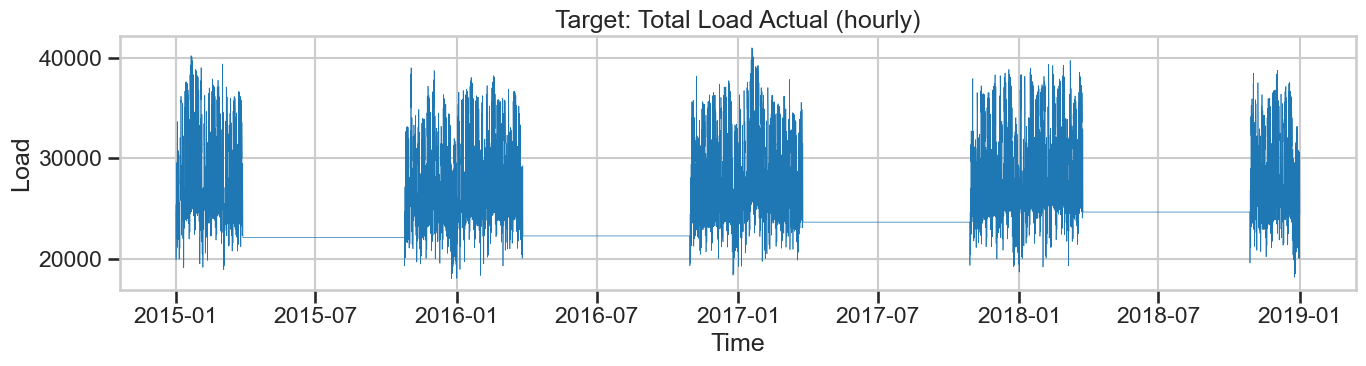

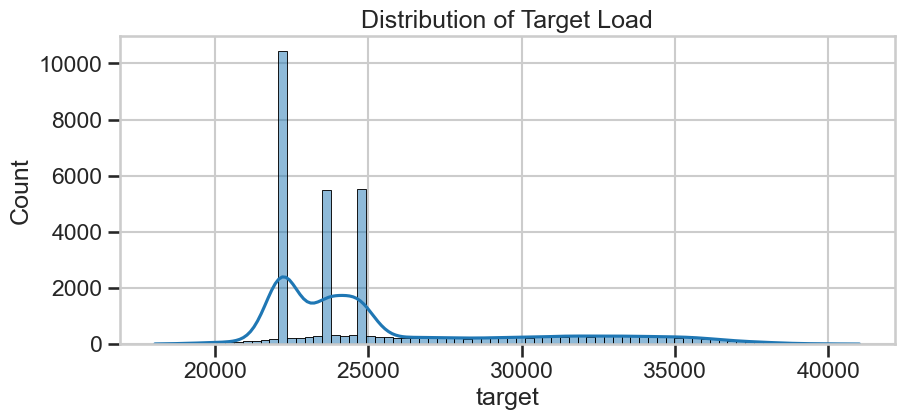

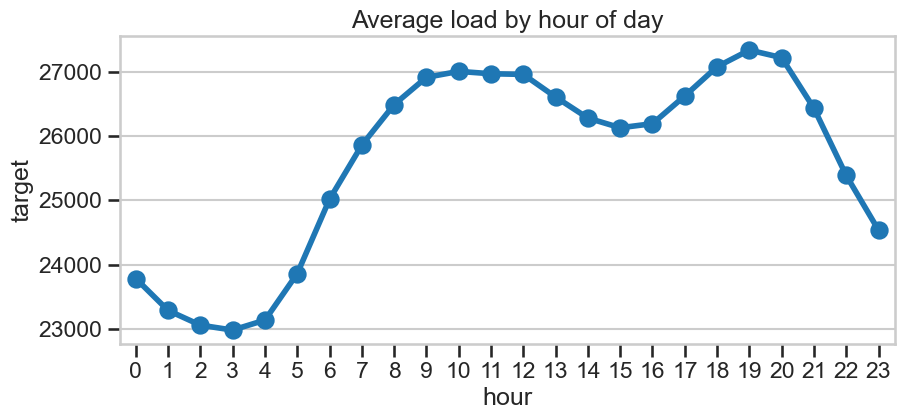

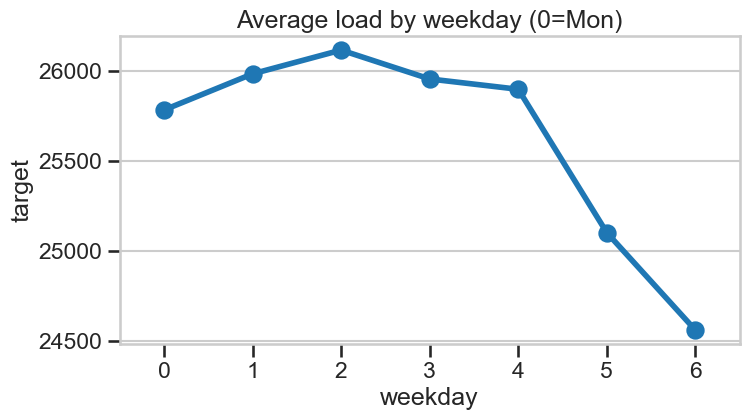

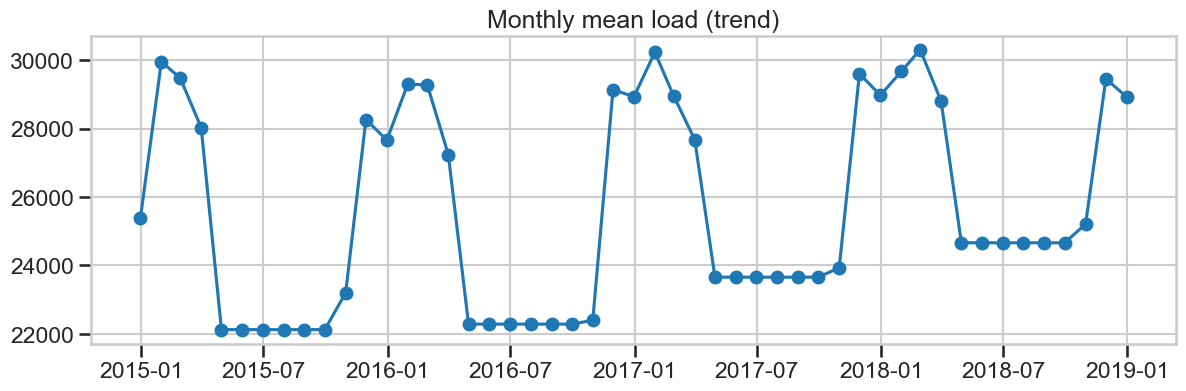

In [8]:
# Cell 8 - Exploratory Data Analysis (plots)
# 1) Full time series
plt.figure(figsize=(14,4))
plt.plot(full.index, full['target'], linewidth=0.5)
plt.title("Target: Total Load Actual (hourly)")
plt.ylabel("Load")
plt.xlabel("Time")
plt.tight_layout()
plt.show()

# 2) Distribution
plt.figure(figsize=(10,4))
sns.histplot(full['target'].dropna(), bins=80, kde=True)
plt.title("Distribution of Target Load")
plt.show()

# 3) Hourly & weekday seasonal patterns
df_temp = full.copy()
df_temp['hour'] = df_temp.index.hour
df_temp['weekday'] = df_temp.index.dayofweek
plt.figure(figsize=(10,4))
sns.pointplot(x='hour', y='target', data=df_temp.reset_index(), ci=None)
plt.title("Average load by hour of day")
plt.show()

plt.figure(figsize=(8,4))
sns.pointplot(x='weekday', y='target', data=df_temp.reset_index(), ci=None)
plt.title("Average load by weekday (0=Mon)")
plt.show()

# 4) Monthly trend
monthly = df_temp['target'].resample('M').mean()
plt.figure(figsize=(14,4))
plt.plot(monthly.index, monthly.values, marker='o')
plt.title("Monthly mean load (trend)")
plt.show()


In [9]:
# Cell 9 - Feature engineering for ML models
df_model = full.copy()
# datetime features
df_model['hour'] = df_model.index.hour
df_model['dayofweek'] = df_model.index.dayofweek
df_model['month'] = df_model.index.month
df_model['dayofyear'] = df_model.index.dayofyear
df_model['is_weekend'] = (df_model['dayofweek'] >= 5).astype(int)

# Lag features (careful with leakage)
lags = [1, 2, 3, 24, 48, 168]  # short and weekly
for l in lags:
    df_model[f'lag_{l}'] = df_model['target'].shift(l)

# rolling statistics
df_model['rmean_24'] = df_model['target'].shift(1).rolling(24).mean()
df_model['rstd_24'] = df_model['target'].shift(1).rolling(24).std()
df_model['rmean_168'] = df_model['target'].shift(1).rolling(168).mean()

# If you have other generation features, keep them (they were included in 'full')
# final cleanup: drop rows where target or key lags are missing
df_model = df_model.dropna(subset=['target', 'lag_1'])
print("Model dataset shape after feature engineering:", df_model.shape)
display(df_model.head(3))


Model dataset shape after feature engineering: (35063, 44)


,target,df_combined__generation biomass,df_combined__generation fossil brown coal/lignite,df_combined__generation fossil gas,df_combined__generation fossil hard coal,df_combined__generation fossil oil,df_combined__generation hydro pumped storage consumption,df_combined__generation hydro run-of-river and poundage,df_combined__generation hydro water reservoir,df_combined__generation nuclear,...,is_weekend,lag_1,lag_2,lag_3,lag_24,lag_48,lag_168,rmean_24,rstd_24,rmean_168
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,24382.0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,0,25385.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,22734.0,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,0,24382.0,25385.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 02:00:00,21286.0,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,0,22734.0,24382.0,25385.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Cell 10 - Train/validation split (time-based), baseline and feature list
# Use last N days for test (e.g., 30 days)
test_days = 30
test_hours = test_days * 24
train_df = df_model.iloc[:-test_hours].copy()
test_df = df_model.iloc[-test_hours:].copy()

feature_cols = [c for c in df_model.columns if c not in ['target']]
# optionally drop raw large groups (e.g. original timestamp-like columns) - okay for now
print("Train:", train_df.shape, "Test:", test_df.shape)
print("Feature count:", len(feature_cols))


Train: (34343, 44) Test: (720, 44)
Feature count: 43


In [11]:
# Cell 11 - Baseline (persistence), RandomForest and GradientBoosting training & evaluation
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prepare training and testing sets
X_train = train_df[feature_cols]
y_train = train_df['target']
X_test = test_df[feature_cols]
y_test = test_df['target']

# ✅ Handle missing values (fill NaNs with column means)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Baseline: persistence (use last hour)
y_pred_persist = X_test['lag_1'].values
print("Persistence MAE:", mean_absolute_error(y_test, y_pred_persist),
      "RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_persist)))

# RandomForest
rf = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
print("RF MAE:", mean_absolute_error(y_test, y_rf),
      "RMSE:", np.sqrt(mean_squared_error(y_test, y_rf)))

# GradientBoosting
gb = GradientBoostingRegressor(n_estimators=400, random_state=42)
gb.fit(X_train, y_train)
y_gb = gb.predict(X_test)
print("GB MAE:", mean_absolute_error(y_test, y_gb),
      "RMSE:", np.sqrt(mean_squared_error(y_test, y_gb)))


Persistence MAE: 1139.5569444444445 RMSE: 1518.3229733455555
RF MAE: 321.62800000000004 RMSE: 481.70031140590066
GB MAE: 623.0314480328594 RMSE: 773.6386375499719


Top 25 features:


lag_1                                                       0.945072
hour                                                        0.022813
lag_24                                                      0.010511
lag_3                                                       0.007682
lag_2                                                       0.004842
energy_df__generation solar                                 0.001465
df_combined__generation solar                               0.001364
rmean_24                                                    0.000986
lag_48                                                      0.000555
rstd_24                                                     0.000317
energy_df__generation fossil oil                            0.000241
lag_168                                                     0.000223
df_combined__generation fossil oil                          0.000221
rmean_168                                                   0.000208
dayofyear                         

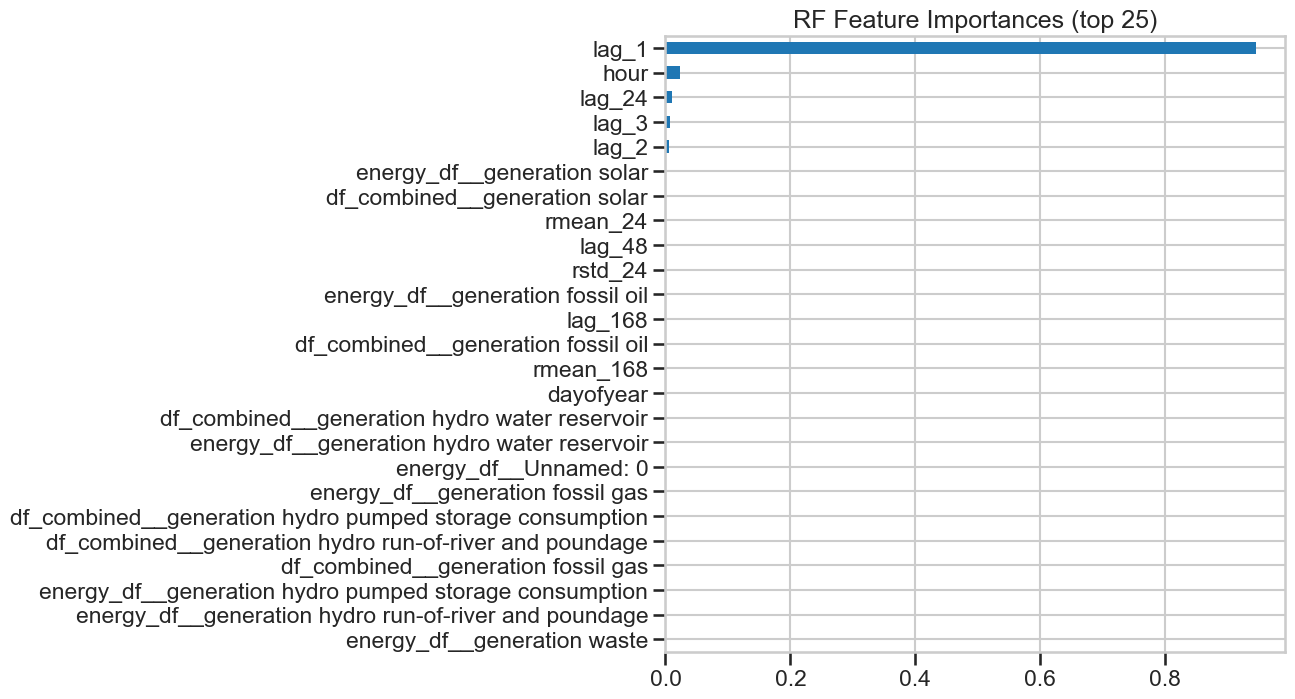

In [12]:
# Cell 12 - Feature importance (RandomForest) and visualization
importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("Top 25 features:")
display(importances.head(25))

plt.figure(figsize=(8,8))
importances.head(25).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("RF Feature Importances (top 25)")
plt.show()


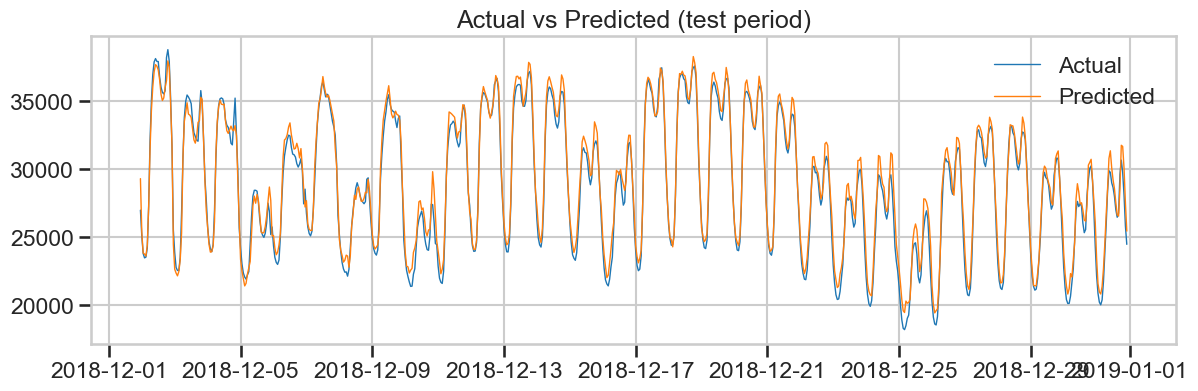

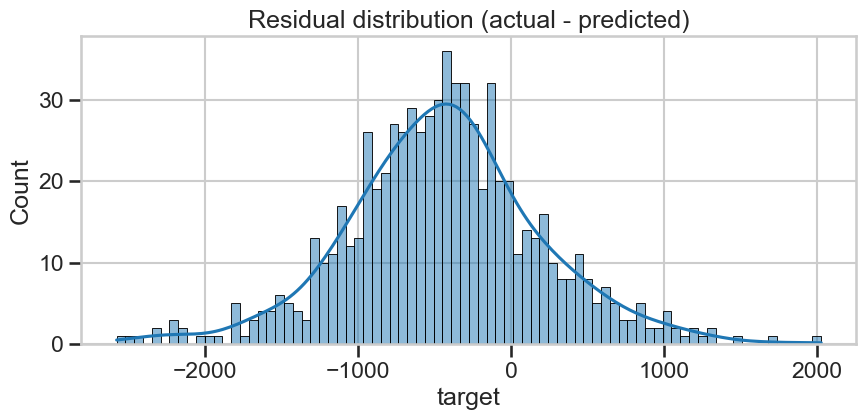

Test MAE: 623.0314
Test RMSE: 773.6386


In [13]:
# Cell 13 - Residual diagnostics & prediction plot for best model (choose RF or GB)
best_pred = y_gb  # switch to y_rf if RF performed better
resid = y_test - best_pred

plt.figure(figsize=(14,4))
plt.plot(y_test.index, y_test, label='Actual', linewidth=1)
plt.plot(y_test.index, best_pred, label='Predicted', linewidth=1)
plt.legend()
plt.title("Actual vs Predicted (test period)")
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(resid, bins=80, kde=True)
plt.title("Residual distribution (actual - predicted)")
plt.show()

# Metrics (compatible with older sklearn versions)
mae = mean_absolute_error(y_test, best_pred)
rmse = np.sqrt(mean_squared_error(y_test, best_pred))
print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")


In [ ]:
# Cell 14 - Walk-forward backtesting (time-series cross validation) - show mean MAE across folds
from sklearn.model_selection import TimeSeriesSplit

def timeseries_cv_score(model, X, y, splits=5, metric=mean_absolute_error):
    tscv = TimeSeriesSplit(n_splits=splits)
    scores = []
    for train_idx, val_idx in tscv.split(X):
        m = model.__class__(**model.get_params())
        m.fit(X.iloc[train_idx], y.iloc[train_idx])
        preds = m.predict(X.iloc[val_idx])
        scores.append(metric(y.iloc[val_idx], preds))
    return np.array(scores)

# Example: use RF for cv
rf_cv = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
scores = timeseries_cv_score(rf_cv, train_df[feature_cols], train_df['target'], splits=4)
print("CV MAE per fold:", scores, "mean:", scores.mean())


Fitting optimized SARIMAX (daily seasonality)...


c:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model fitted successfully!
SARIMAX MAE: 2250.611, RMSE: 2958.963


c:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


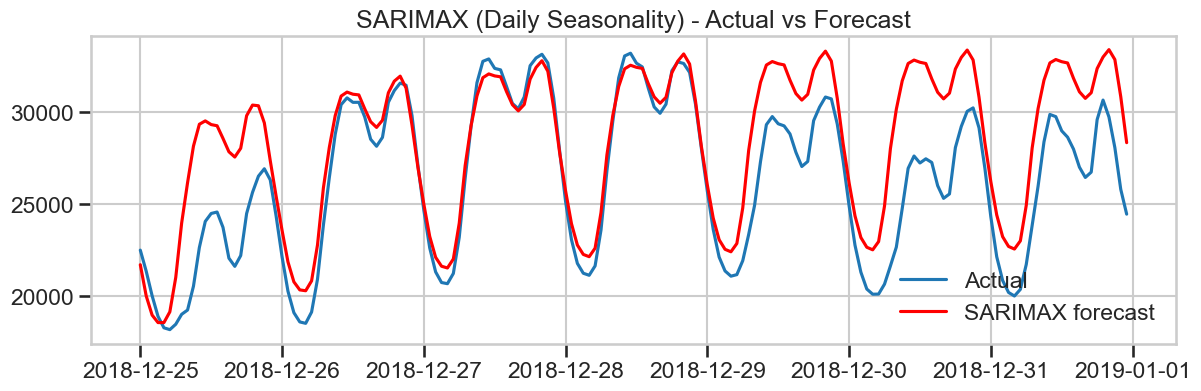

In [ ]:
# Cell 15 - Faster SARIMAX modeling (compatible version)
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Use only the last ~5000 hours (about 7 months) to reduce computation
series = base_df['target'].dropna().iloc[-5000:]

# Split into train/test
test_hours = 24 * 7  # one week for testing
sar_train = series.iloc[:-test_hours]
sar_test = series.iloc[-test_hours:]

# Faster SARIMAX configuration (daily seasonality s=24)
order = (1, 0, 1)
seasonal_order = (1, 1, 1, 24)
print("Fitting optimized SARIMAX (daily seasonality)...")
sar_model = sm.tsa.statespace.SARIMAX(
    sar_train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
sar_res = sar_model.fit(disp=False)
print("Model fitted successfully!")

# Forecast
sar_pred = sar_res.get_forecast(steps=len(sar_test)).predicted_mean

# Evaluation
mae = mean_absolute_error(sar_test, sar_pred)
rmse = np.sqrt(mean_squared_error(sar_test, sar_pred))  # manual RMSE calc
print(f"SARIMAX MAE: {mae:.3f}, RMSE: {rmse:.3f}")

# Plot results
plt.figure(figsize=(14,4))
plt.plot(sar_test.index, sar_test, label='Actual')
plt.plot(sar_test.index, sar_pred, label='SARIMAX forecast', color='red')
plt.legend()
plt.title("SARIMAX (Daily Seasonality) - Actual vs Forecast")
plt.show()


Random Forest Test MAE: 321.6280
Random Forest Test RMSE: 481.7003


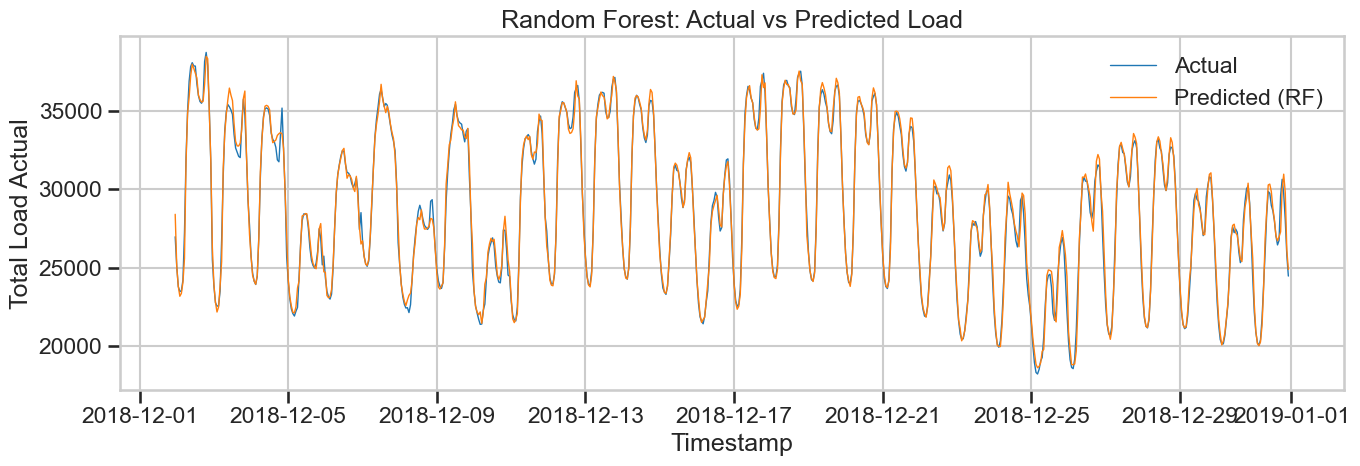

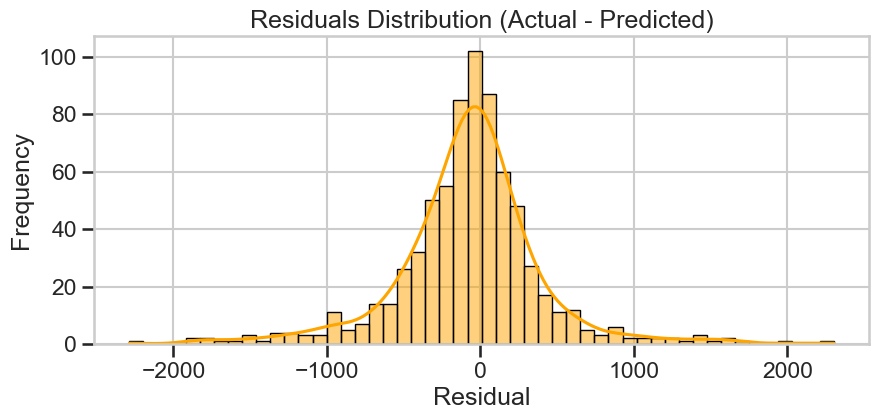

In [ ]:
# Cell - Visualize Actual vs Predicted (Random Forest)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict using trained Random Forest
y_rf = rf.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_rf))
print(f"Random Forest Test MAE: {mae:.4f}")
print(f"Random Forest Test RMSE: {rmse:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(14,5))
plt.plot(y_test.index, y_test, label='Actual', linewidth=1)
plt.plot(y_test.index, y_rf, label='Predicted (RF)', linewidth=1)
plt.title("Random Forest: Actual vs Predicted Load")
plt.xlabel("Timestamp")
plt.ylabel("Total Load Actual")
plt.legend()
plt.tight_layout()
plt.show()

# Residual distribution
residuals = y_test - y_rf
plt.figure(figsize=(10,4))
sns.histplot(residuals, bins=50, kde=True, color='orange')
plt.title("Residuals Distribution (Actual - Predicted)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()
